In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [2]:
DATASET_PATH='Grapevine_Leaves_Image_Dataset'

In [3]:
datagen=ImageDataGenerator(
rescale=1/255.0, 
validation_split=0.2,
rotation_range=20,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2

)

In [4]:
train_data=datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"

)

Found 400 images belonging to 5 classes.


In [5]:
test_data=datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 100 images belonging to 5 classes.


In [6]:
class_name=list(train_data.class_indices.keys())
class_name

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(5,activation="softmax"))
model.add(Dropout(0.2))







In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,790,277 (14.46 MB)

 Trainable params: 3,790,277 (14.46 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)


In [15]:
history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=early,
    batch_size=32,
    verbose=1
)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.2000 - loss: 4.2463 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.2125 - loss: 4.1458 - val_accuracy: 0.2200 - val_loss: 1.6094
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.1925 - loss: 4.1568 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.2025 - loss: 3.8348 - val_accuracy: 0.2000 - val_loss: 1.6093
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.1925 - loss: 4.6626 - val_accuracy: 0.2000 - val_loss: 1.6095


In [16]:
loss,accuracy=model.evaluate(test_data)
print(f"loss:{loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.2000 - loss: 1.6093
loss:1.6093354225158691


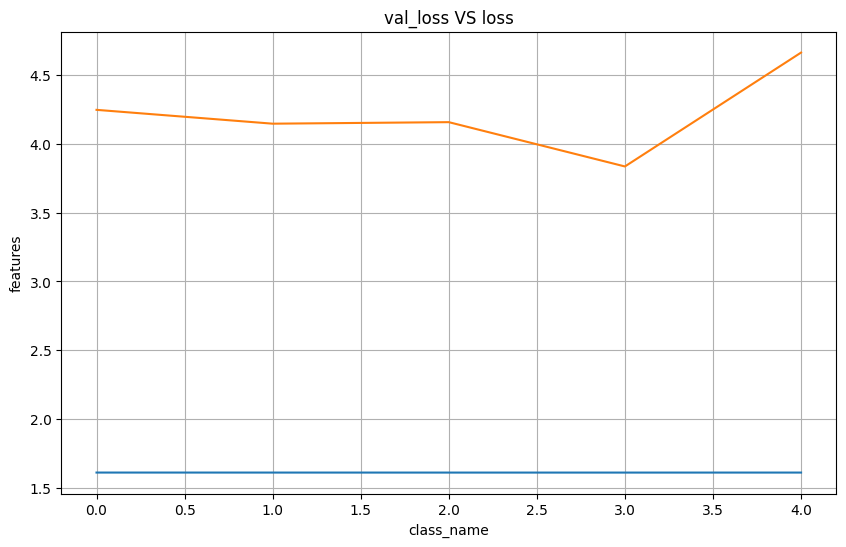

In [17]:
plt.figure(figsize=[10,6])
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.xlabel("class_name")
plt.ylabel("features")
plt.title("val_loss VS loss")
plt.grid(True)
plt.show()

In [ ]:
img_path=""
img=image.load_img(img_path,target_size=(128,128))
img_array=image.img_to_array(img)
img_array=img_array/255.0
img_array=np.expand_dims(img_array,axis=0)

pred=model.predict(img_array)
prediction=np.argmax(pred)
prediction

plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.show()
